[1] 100   8

[1] "Home"     "Products" "Search"   "Prod_A"   "Prod_B"   "Prod_C"   "Cart"    
[8] "Purchase"

Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"Warning message:
"did not converge in 1000 iterations"

K-means clustering with 7 clusters of sizes 14, 17, 10, 11, 19, 9, 20

Cluster means:
       Home  Products     Search     Prod_A     Prod_B    Prod_C      Cart
1 1.0000000 0.4285714 0.28571429 0.71428571 0.07142857 0.1428571 0.0000000
2 0.5294118 0.8823529 1.00000000 0.17647059 0.94117647 0.5294118 0.2941176
3 0.0000000 1.0000000 0.10000000 0.00000000 1.00000000 0.9000000 1.0000000
4 0.0000000 1.0000000 0.00000000 0.09090909 1.00000000 0.6363636 0.0000000
5 1.0000000 1.0000000 0.05263158 0.89473684 0.52631579 0.3157895 1.0000000
6 0.0000000 0.1111111 0.11111111 1.00000000 0.44444444 0.0000000 0.7777778
7 0.9000000 0.5000000 0.95000000 0.65000000 0.15000000 0.6000000 1.0000000
   Purchase
1 0.0000000
2 0.0000000
3 0.9000000
4 0.0000000
5 0.5789474
6 0.6666667
7 0.6500000

Clustering vector:
  [1] 1 7 1 7 7 2 7 2 2 7 7 1 7 7 2 5 7 7 1 1 7 7 5 1 5 2 5 5 2 5 5 1 5 2 5 2 5
 [38] 2 2 4 4 4 3 4 2 2 3 6 1 7 7 7 5 1 4 6 6 1 5 5 7 1 5 7 5 1 1 5 2 5 7 5 6 1
 [75] 7 6 6 7 5 6 6 6 2 3 4 4 4 3 4 2 

Warning message in ordiplot(cmd, type = "n"):
"Species scores not available"

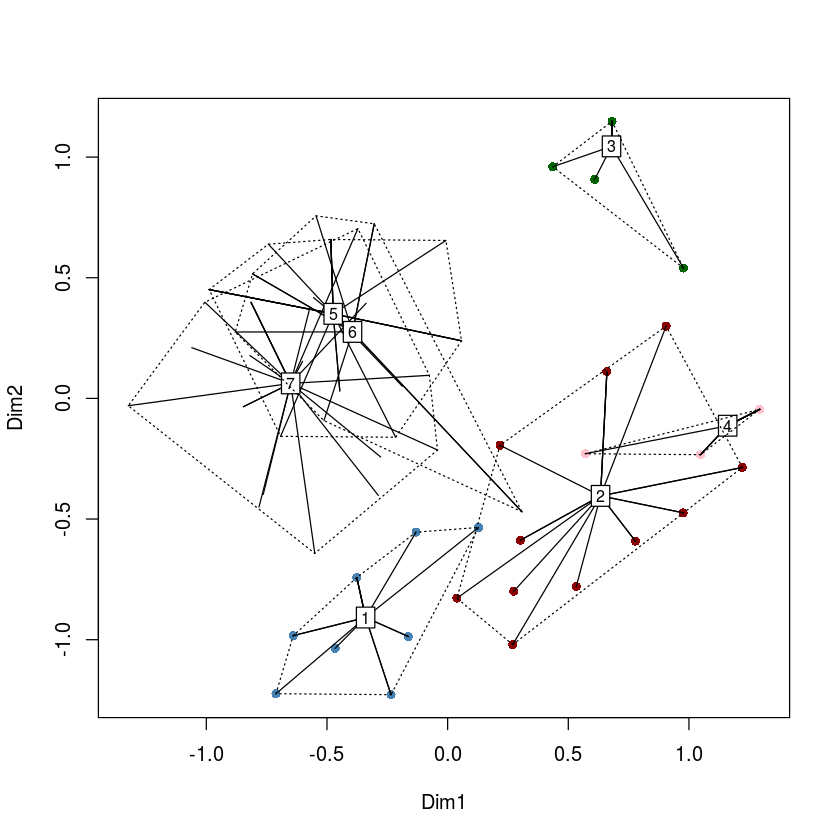

In [4]:
library(data.table)
library(ggplot2)
library(vegan)

# Read bank data

Session_data = read.csv('Sessions.csv')
Session_data = data.table(Session_data)
dim(Session_data)

colnames(Session_data)

#Plotting the data
#dotchart(t(Session_data), color=c("red","blue","darkgreen"), main="Dotchart for Seaaions", cex=0.8)

#Clustering
# kmeans
kclus <- kmeans(Session_data,center= 7, iter.max=1000, nstart=10000)

#printing kmeans
print(kclus)

# distance matrix
Sessiondata_dist <- dist(Session_data)

# Multidimensional scaling
cmd <- cmdscale(Sessiondata_dist)

# plot MDS, with colors by groups from kmeans
groups <- levels(factor(kclus$cluster))
ordiplot(cmd, type = "n")
cols <- c("steelblue", "darkred", "darkgreen", "pink")
for(i in seq_along(groups)){
  points(cmd[factor(kclus$cluster) == groups[i], ], col = cols[i], pch = 16)
}

# add spider and hull
ordispider(cmd, factor(kclus$cluster), label = TRUE)
ordihull(cmd, factor(kclus$cluster), lty = "dotted")
